# This is a simpe linear regression example:  it uses a fucntion called polyfit. #

First we will call a style class so that this document will look a bit better.  If you want to know how to change the style class.  See the working with notebooks in teaching numerical methods contained in the super directory of this example.  

In [1]:
from IPython.core.display import HTML
css_file = './example.css'
HTML(open(css_file, "r").read())

In [2]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn
from pylab import plot, title, show , legend
import matplotlib.pyplot as plt

Above are the definitions for the packages that are needed.

Now we will make up some data to fit.  In this example we will use the linear regression to fit some simple polynomial data.  Note that there are many fit funtions that can be used such as power etc.  We will add some randomness to the data so that the fitting is not just a simple problem.  

In [3]:
n=100;

We need one hundred points in time on the domain -5 to 5.  We can use the linespace fuction  to create this needed data.

In [4]:
t=linspace(-5,5,n)

Now we must supply the data to be used in the fitting algorythm.  We will create a polyinomial with the following parameters and then add randome noise to the data providing an impoerfect data set to which we can apply a fit.

In [5]:
a=0.5; b=-1;c =1     # parameters
x=polyval([a,b,c],t) # polynomial data
xn=x+randn(n)        # data + some noise

Now tha the data has been created we will do the fitting.  First the polyfit is called, note that 2 referes to second order and that there are three outputs one for each coef. If you raised the degree to 3 you would need 4 coefs and so on. This change must be propogated throught the software.  Note that one should be able to write an algorythm that changes dynamically based on the degree of the fit.  

In [6]:
(ar,br,cr)=polyfit(t,xn,2)

Now that we have the coef we use the polyval fucntion to create the new fitted curve.

In [7]:
xr=polyval([ar,br,cr],t)

Now estimate the error using a simple fuction. Note this is not the RMS error or sdev which should be included.  That is actually done below.

In [8]:
err=sqrt(sum((xr-xn)**2)/n)

In [9]:
print('Linear regression using polyfit')
print('parameters: a=%.2f b=%.2f c=%.2f \nregression: a=%.2f b=%.2f c=%.2f, ms error= %.3f' % (a,b,c,ar,br,cr,err))

Linear regression using polyfit
parameters: a=0.50 b=-1.00 c=1.00 
regression: a=0.47 b=-1.01 c=1.36, ms error= 0.862


In [10]:
#title('Linear Regression Example')

In [11]:
#plot(t,x,'g.--')

In [12]:
#plot(t,xn,'k.')

In [13]:
#plot(t,xr,'r.-')

In [14]:
#legend(['original','plus noise', 'regression'])

In [15]:
#show()

Note that we have to restart the kernal regularly in order to make the system see changes.  That is we might update something and then not see the effect untill the kernal has been started again. 

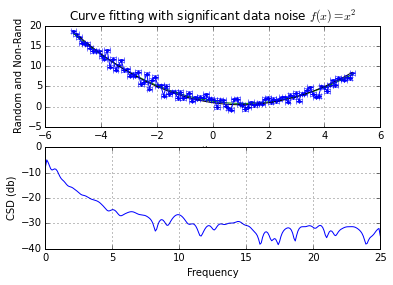

In [18]:
%matplotlib inline  
# hash this out to get the external plot
plt.subplot(211)
# Here I learned that the 'b.' makes a set of blue dots for data whicle 'g-'
# Creates a line..see pyplot manual for details.  
plt.plot(t, xn, 'b.', t, xr, 'g-', t, x, 'k-')
plt.xlim(-6,6)
plt.xlabel('time')
plt.ylabel('Random and Non-Rand')
plt.grid(True)
plt.title('Curve fitting with significant data noise $ f(x) = x^2$')
plt.errorbar(t, xn, xerr=0.1, yerr=0.4)

plt.subplot(212)
cxy, f = plt.csd(xn, xr, 512, 1/.02)  # note the .02 is dt some step
plt.ylabel('CSD (db)')
plt.show()

In [21]:
(a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)

In [22]:
print('Linear regression using stats.linregress')

Linear regression using stats.linregress


In [23]:
print('parameters: a=%.2f b=%.2f c=%.2f\nregression: a=%.2f b=%.2f, std error= %.3f' % (a,b,c,a_s,b_s,stderr))

parameters: a=0.50 b=-1.00 c=1.00
regression: a=-1.02 b=5.39, std error= 0.130
